# 경제지표
- description: 알아야 산다
- layout: post
- categories: [경제]
- toc: true

In [1]:
import datetime
datetime.datetime.now().strftime('%c')

'Tue Dec  1 01:37:32 2020'

전체 코드는 [GitHub](https://github.com/everlearningemployee/blog/blob/master/_notebooks/2020-08-19-Economic_indicators.ipynb) 참고 바랍니다

In [2]:
#hide
!pip install matplotlib quandl finance-datareader bs4

In [3]:
#hide
import matplotlib.pyplot as plt
from matplotlib import font_manager
plt.rcParams["font.family"] = 'gulim'
plt.rcParams["figure.figsize"] = (15,5)

import pandas as pd
import numpy as np
import requests, json

# 구매

## 미국 ISM 제조업 구매관리자 지수 (PMI) 
- ISM이란: '구매부장님협회' 쯤 ([구글검색](https://www.google.com/search?newwindow=1&sxsrf=ALeKk03yyI9WKgi0etx-fs_1dvTKtMswrA%3A1597932188575&ei=nII-X6PbIreTr7wPsa-9wAg&q=ism+%EC%A0%9C%EC%A1%B0%EC%97%85+%EA%B5%AC%EB%A7%A4%EA%B4%80%EB%A6%AC%EC%9E%90+%EC%A7%80%EC%88%98&oq=ism&gs_lcp=CgZwc3ktYWIQAxgBMgQIIxAnMgQIIxAnMgYIIxAnEBMyAggAMgQIABBDMgIIADICCAAyAggAMgcIABAUEIcCMggIABCxAxCDAToECAAQRzoFCAAQywFQqq0BWNe5AWC3ywFoAXABeACAAYQBiAG5ApIBAzIuMZgBAKABAaoBB2d3cy13aXrAAQE&sclient=psy-ab))
- +: 경기확장 / -: 경기위축 
- 기준: 50        

In [4]:
#hide
import quandl
quandl.ApiConfig.api_key = "g__NU8_KS5-db8Z8sWLs"

findfont: Font family ['gulim'] not found. Falling back to DejaVu Sans.


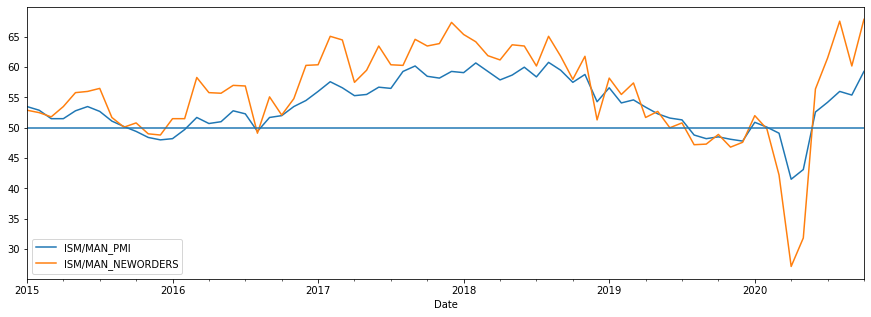

In [5]:
indx = [
    ('ISM/MAN_PMI'      , 'PMI'  , 'ISM 제조업 구매관리자 지수 (PMI)'), 
    ('ISM/MAN_NEWORDERS', 'Index', 'ISM 제조업 신규주문 지수'        ), 
    #('ISM/NONMAN_NMI'   , 'Index', 'ISM 서비스업 구매관리자 지수'    ), 
]

for indxCd, colNm, labelNm in indx:
    d = quandl.get(indxCd, start_date = '2015-01-01')
    s = d[colNm]
    p = s.plot(label = indxCd) # 한글 폰트 문제

p.axhline(50) # PMI는 50이 기준
tmp = p.legend(loc='lower left')

- 데이터/API 출처: https://www.quandl.com/data/ISM/MAN_PMI-PMI-Composite-Index / https://www.quandl.com/tools/python

## 중국 차이신 제조업 구매관리자 지수
- HSBC가 작성하는 중국 제조업 구매관리자지수
- https://kr.investing.com/economic-calendar/chinese-caixin-manufacturing-pmi-753

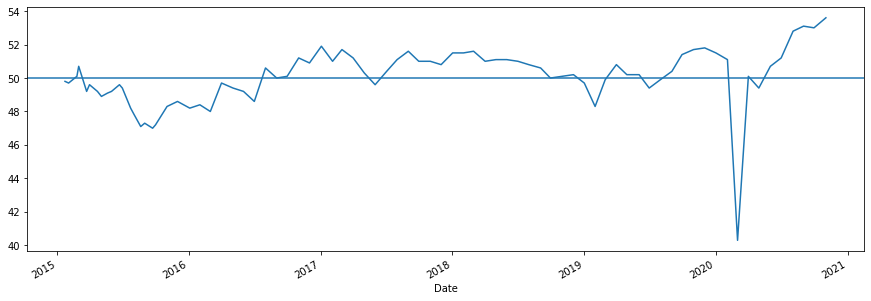

In [6]:
url = 'https://sbcharts.investing.com/events_charts/us/753.json'
hdr = {'User-Agent': 'Mozilla/5.0'}
resp = requests.get(url, headers=hdr)
json_data = json.loads(resp.text)

df = pd.DataFrame(json_data['attr']).rename(columns={'timestamp':'Date'}).set_index('Date')
df.index = pd.to_datetime(df.index*1000000)
p = df['actual']['2015':].plot()
tmp = p.axhline(50) # PMI는 50이 기준

# 원자재

### 원유

#### WTI유 선물: 
- https://kr.investing.com/commodities/crude-oil

#### WTI유 현물: 
- https://kr.investing.com/currencies/wti-usd

In [7]:
#hide
hdr_wti = {
    'User-Agent': 'Mozilla/5.0',
    'X-Requested-With': 'XMLHttpRequest',
    'Referer': 'https://www.investing.com',
}
iterval = {
    '1-day'   : 300    , 
    '1-week'  : 1800   ,
    '1-month' : 3600   ,
    '3-months': 18000  ,
    '6-months': 18000  ,
    '1-year'  : 86400  ,
    '5-years' : 'month',
    'max'     : 'month',
}
prm_wti = {
    'pair_id': 8831,
    #'pair_id_for_news': 8831,
    'chart_type': 'area',
    'pair_interval': 86400,
    'candle_count': 120,
    #'events': 'yes',
    #'volume_series': 'yes',
    'period': '1-year',
}

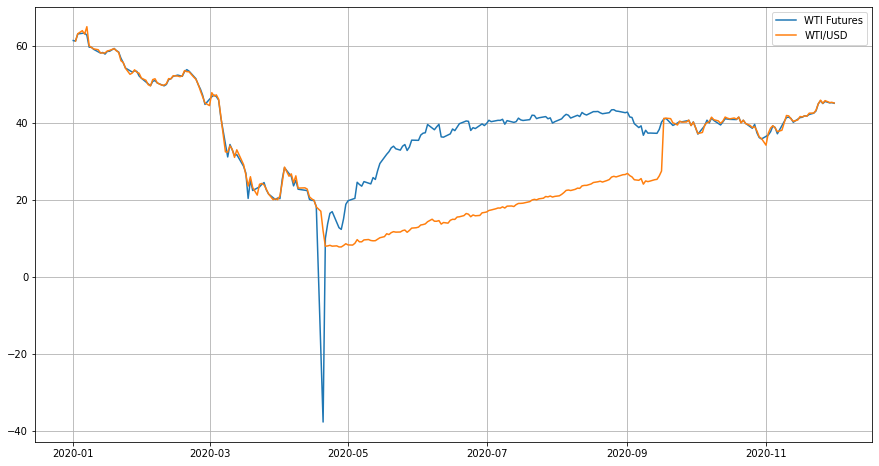

In [8]:
url = 'https://www.investing.com/common/modules/js_instrument_chart/api/data.php'
prm_wti['period'] = period = '1-year'
prm_wti['pair_interval'] = iterval[period]
indx_wti = [
    (8849   , 'WTI Futures'), # Crude Oil WTI Futures
    (1043109, 'WTI/USD'    ), # WTI/USD - Crude Oil WTI Spot US Dollar
    #(8831,    'Copper Futures'), # 구리 선물
]

plt.figure(figsize=(15, 8))
for cd, lbl in indx_wti:
    prm_wti['pair_id'] = cd
    resp = requests.get(url, headers=hdr_wti, params=prm_wti)
    json_data = json.loads(resp.text)

    df = pd.DataFrame(json_data['candles'], columns=['Date', lbl]).set_index('Date')
    df.index = pd.to_datetime(df.index*1000000)
    ax = plt.plot(df['2020-01-01':], label=lbl)

tmp = plt.grid()    
tmp = plt.legend()

### 구리 선물
- 왜 중요한가: [구리 박사 vs 코코아 선생, 경기를 보는 두 지표 - 매일경제](https://www.mk.co.kr/opinion/contributors/view/2020/07/782882/)
- [런던금속거래소(London Metal Exchange) LME Copper](https://www.lme.com/Metals/Non-ferrous/Copper#tabIndex=2)
- https://markets.businessinsider.com/commodities/copper-price
- LME 데이터는 무료를 못 찾았으니까 아쉬운대로 COMEX (근데 COMEX 맞음?)
  - https://github.com/FinanceData/FinanceDataReader
    - https://www.investing.com/commodities/copper 데이터

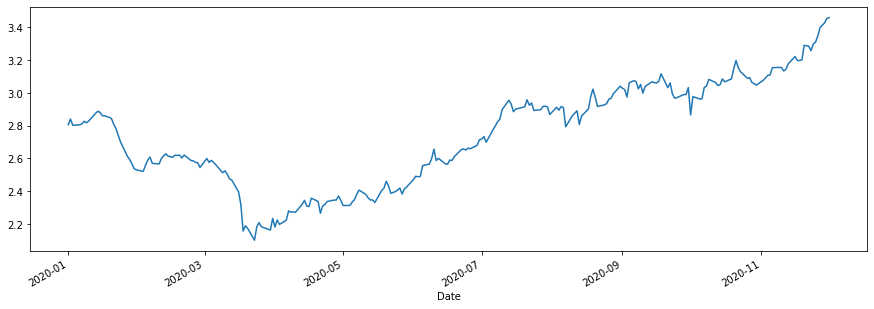

In [9]:
import FinanceDataReader as fdr
df_copper = fdr.DataReader('HG', '2018')
tmp = df_copper['Close']['2020':].plot()

# 소비재

### 인터콘티넨탈 거래소 코코아 선물 (ICE Cocoa Future)
- 불황에는 사람들이 코코아를 덜 먹는다고 함
- https://www.theice.com/products/7/Cocoa-Futures/data?marketId=5867687&span=2

In [10]:
#hide
import requests, json
import pandas as pd

In [11]:
#hide
prm_ice = {
    'marketId': 5867687, # Cocoa Future
    'historicalSpan': 3, # {3개월:1, 1년:2, 2년:3}
    'getHistoricalChartDataAsJson': '',
} 

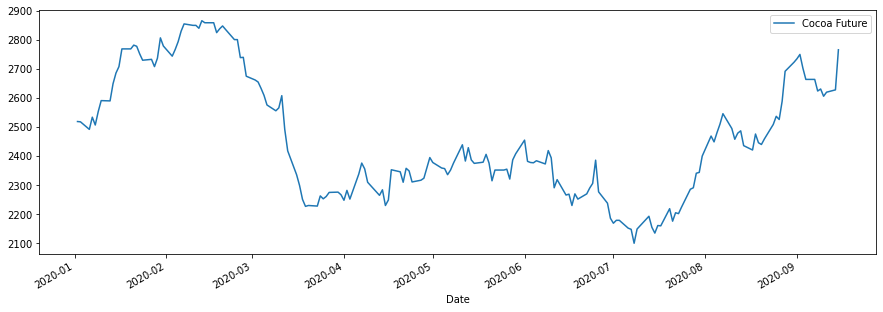

In [12]:
url_ice = 'https://www.theice.com/marketdata/DelayedMarkets.shtml' 
resp = requests.get(url_ice, params=prm_ice)
json_data = json.loads(resp.text)
bars = json_data['bars']    

df_cocoa = pd.DataFrame(bars, columns = ['Date', 'Cocoa Future']).set_index('Date')   
df_cocoa.index = pd.to_datetime(df_cocoa.index)
tmp = df_cocoa['2020-01-01':].plot()

In [13]:
# hide
a='''
# 분석
- 구리선물을 보면 경기가 좋아질 것 같고, 코코아를 보면 좋아질 것 같지 않다.
- 2018년 이후 변동을 보면 서로 반대로 움직이는 경우도 많았다. 반대로 움직이는 것이 시사하는 바는 무엇인가?
- 무언가 다른 지표랑 더 비교을 해보고 싶다
'''

No handles with labels found to put in legend.


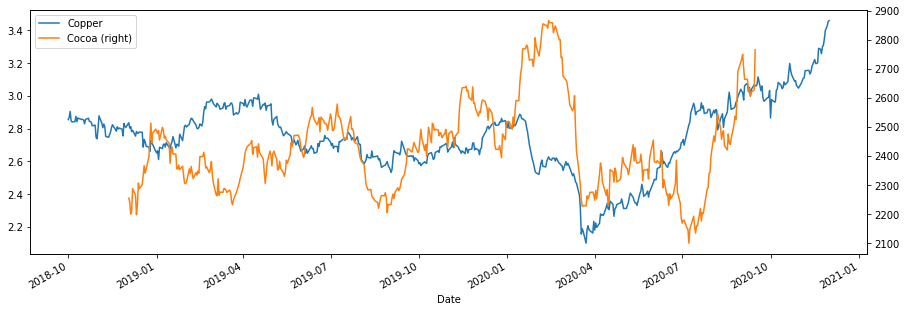

<Figure size 1080x360 with 0 Axes>

In [14]:
# hide
fromDt = '2018-10'
plt.rcParams["figure.figsize"] = (15,5)
df_copper[fromDt:]['Close'].plot(label='Copper', legend='Copper')
df_cocoa[fromDt:]['Cocoa Future'].plot(label='Cocoa', legend='Cocoa', secondary_y=True)
tmp = plt.figure().legend()

# 고용지표

### 미국 신규실업수당 청구건수 (Initial Jobless Claims, ICSA)
- https://fred.stlouisfed.org/graph/?g=uvUG

### 미국 실업률
- https://fred.stlouisfed.org/graph/?g=uw4u

In [15]:
#hide
import requests, json
import pandas as pd
from io import StringIO

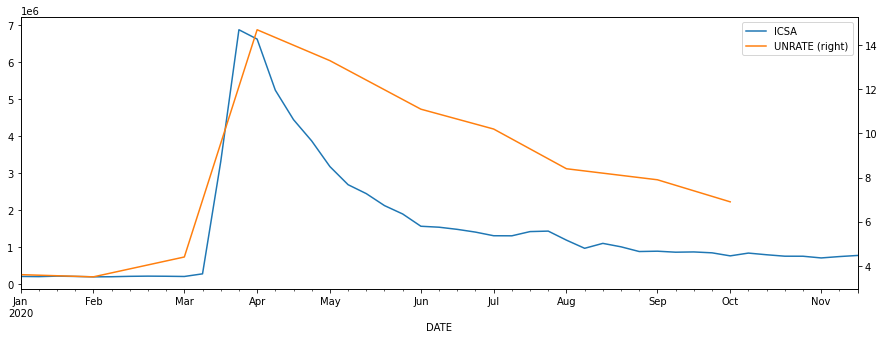

In [16]:
indx_fed = [
    ('ICSA'  , '미국 신규실업수당 청구건수'), 
    ('UNRATE', '미국 실업률'               ), 
]
url_fed = 'https://fred.stlouisfed.org/graph/fredgraph.csv'
ax = None
for id, labelNm in indx_fed:
    prm = {
            'id': id,
            'cosd': '2020-01-01', # from dt
            #'coed': '2020-08-15', # to dt
        }
    resp = requests.get(url_fed, params=prm)
    csv = StringIO(resp.text)
    df = pd.read_csv(csv).set_index('DATE')
    df.index = pd.to_datetime(df.index)
    ax = df.plot(ax=ax, label=labelNm, secondary_y=(ax != None))

# COVID-19
- https://github.com/CSSEGISandData/COVID-19/tree/master/who_covid_19_situation_reports
 - WHO Time Series CSV: https://covid19.who.int/WHO-COVID-19-global-data.csv 
 - WHO regions: https://en.wikipedia.org/wiki/WHO_regions

In [17]:
# hide
label = {
    'AFRO':'African Region (AFRO)',
    'AMRO':'Region of the Americas (PAHO)', # PAHO? AMRO?
    'PAHO':'Region of the Americas (PAHO)', # PAHO? AMRO?
    'SEARO':'South-East Asia Region (SEARO)',
    'EURO':'European Region (EURO)',
    'EMRO':'Eastern Mediterranean Region (EMRO)',
    'WPRO':'Western Pacific Region (WPRO)',
}    

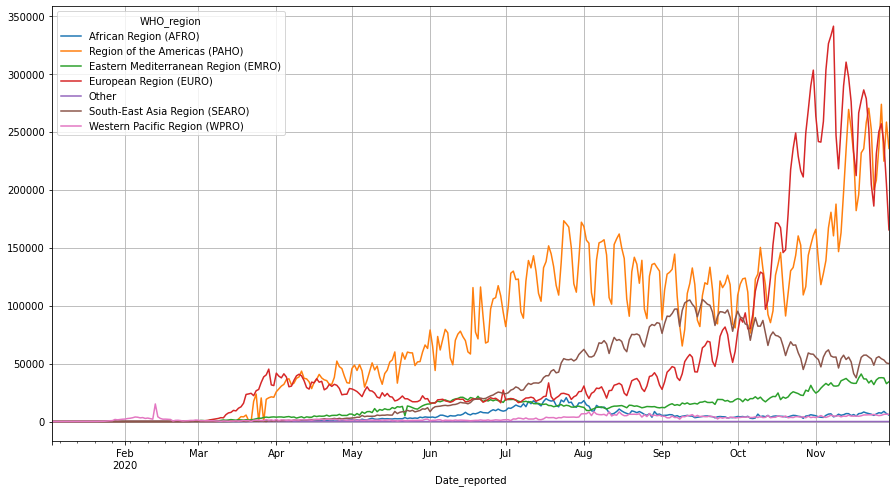

In [18]:
csv_url = 'https://covid19.who.int/WHO-COVID-19-global-data.csv'
df = pd.read_csv(csv_url) \
       .rename(columns=lambda x: x.strip()) # 컬럼명 앞에 공백있음
df.Date_reported = pd.to_datetime(df.Date_reported)
df = df.set_index('Date_reported')

pv = df.pivot_table(index='Date_reported', columns='WHO_region', values='New_cases', aggfunc=np.sum)
pv = pv.rename(columns=label)
ax = pv.plot(figsize=(15, 8)).grid()

No handles with labels found to put in legend.


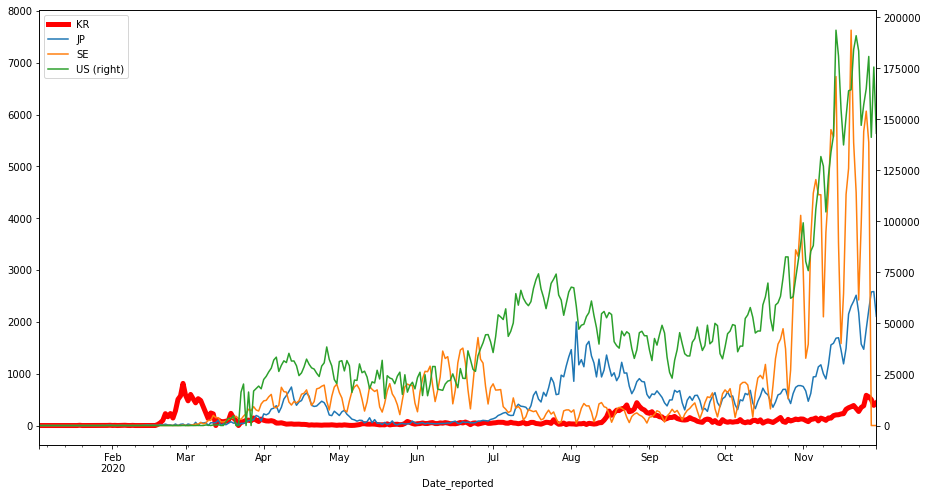

<Figure size 1080x360 with 0 Axes>

In [19]:
plt.figure(figsize=(15, 8))
df_country = df['2020':][df.Country_code.isin(['KR','JP','SE','US'])] 
pv = df_country.pivot_table(index='Date_reported', columns='Country_code', values='New_cases', aggfunc=np.sum)
pv.KR.plot(legend='KR', style='r', lw=5)
pv.JP.plot(legend='JP', style='-')
pv.SE.plot(legend='SE', style='-')
pv.US.plot(legend='US', style='-',secondary_y=True)
plt.figure().legend()
plt.show()

In [20]:
import datetime
datetime.datetime.now().strftime('%c')

'Tue Dec  1 01:38:02 2020'

# 공부한 YouTube 영상

> youtube: https://youtu.be/w3DHeB62cfA

> youtube: https://youtu.be/ucGodW3bpIc